# Task - 5

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

df.shape

(10000, 15)

## Observations:

1. There are 10000 rows or datapoints and 15 features or variables

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## Observations:

1. There are initially 7 int datatype variables, 2 float datatype variables and 6 object datatype variables in the dataset.
2. There are null values in <b>Health Indicator, Holding_Policy_Duration, Holding_Policy_Type </b> features.

## 2. Cleaning the Data

In [5]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

df['Health Indicator'].fillna(df['Health Indicator'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0],axis=0,inplace=True)

## observations:

1. I replaced null values with mode of that features.

In [6]:
# Check again Holding_Policy_Duration is in object column convert that into int

df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].apply(lambda x: str(15) if x=='14+' else x)
df['Holding_Policy_Duration']=pd.to_numeric(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].dtype

dtype('int64')

## Observations:

1. First I replaced <b>14+</b> in <b>Holding_Policy_Duration</b> feature with <b>15</b>.
2. Later converted this feature into int datatype using <b>pandas.to_numeric()</b> inbuilt function.

In [7]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


df[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse']].nunique()

Accomodation_Type      2
Reco_Insurance_Type    2
Is_Spouse              2
dtype: int64

## Observations:

1. <b>Accomodation_Type, Reco_Insurance_Type, Is_Spouse</b> have only 2 unique values.

In [8]:
# Converting all the Yes to 1 and No to 0. 
# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:1 if x=='Owned' else 0)
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:1 if x=='Individual' else 0)
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:1 if x=='Yes' else 0)

## Observations:

1. I converted values of <b>Accomodation_Type, Reco_Insurance_Type, Is_Spouse</b>features into 1 and 0.<br>
    a. <b>Accomodation_Type</b>: 'Owned' by 1, 'Rented' by 0.<br>
    b. <b>Reco_Insurance_Type</b>: 'Individual' by 1, 'Joint' by 0.<br>
    c. <b>Is_Spouse</b>: 'Yes' by 1, 'No' by 0.

In [9]:
# Now again having a look at all those columns to see if everything went well

# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int64  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## Observations:

1. Now there are no null values in the dataset.
2. There are 11 int datatype, 2 float datatype, 2 object datatype features in the dataset.

In [10]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df[['City_Code','Health Indicator']].nunique()

City_Code           36
Health Indicator     9
dtype: int64

## Observations:

1. <b>City Code, Health Indicator</b> features have 36, 9 unique values respectively.

In [11]:
# Lets just try to see what is happening Response. Check the output.

df['Response']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Response, Length: 10000, dtype: int64

In [12]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape


df.drop('Unnamed: 0',axis=1,inplace=True)

df.shape

(10000, 14)

In [13]:
# Getting all the Object Dtypes

df.select_dtypes(include='object').columns

Index(['City_Code', 'Health Indicator'], dtype='object')

In [14]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(handle_unknown='ignore')
one_hot_encoded=OHE.fit_transform(df[['Health Indicator']])

df_encoded=pd.DataFrame(one_hot_encoded.toarray(),columns=sorted(df['Health Indicator'].unique().tolist()))

In [15]:
# Concatinating the original data frame and onehot encoded dataframe

final_df=df.join(df_encoded)

In [16]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe


final_df.drop(['ID','Health Indicator','X9'],axis=1,inplace=True)

## Observations:

1. I dropped <b>ID, Health Indicator, X9</b> features.
2. I dropped `X9` feature, to avoid multicollinearity.

#### This is the dataframe I left with.

In [17]:
final_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,X1,X2,X3,X4,X5,X6,X7,X8
0,C3,64,1,1,36,36,0,15,2.0,16,13320.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C3,2955,1,1,66,66,0,10,1.0,19,16152.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,C1,1542,0,1,24,24,0,3,1.0,16,7310.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C26,772,0,1,75,75,0,1,3.0,16,15792.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C2,1510,1,0,59,58,1,15,4.0,17,23673.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C3,13,1,0,47,40,1,15,3.0,19,27840.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,C5,1477,0,1,34,34,0,6,1.0,4,10560.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,C1,2357,1,1,64,64,0,8,2.0,19,14716.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,C1,1443,0,1,53,53,0,15,3.0,13,11664.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Perform Exploratory Data Analysis

**To Do:**
1. Perform Univaraite Analysis (Basic pandas statistical description)
2. Perform Bivaraite Analysis (Pandas Cross Tabs)
3. Visualisations - 
    * Univariate - Histograms, boxplot, PDFs, countplot, etc
    * Bivariate - Scatterplot, Boxplots, Pairplot, etc
4. Write proper observations after each plot
5. At the end of the notebook, summarize it with all the best observations you got.

### City Code
#### Lets see the number of cities and see how many customers are there

In [18]:
print('no of cities in the dataframe : ',final_df['City_Code'].nunique())
print()
final_df['City_Code'].value_counts()

no of cities in the dataframe :  36



C1     1796
C2     1505
C3      966
C4      727
C9      428
C7      390
C8      371
C6      361
C10     335
C5      264
C15     239
C11     231
C16     219
C17     211
C13     193
C20     179
C12     168
C19     168
C14     153
C21     136
C24     129
C18     127
C23     123
C22     102
C26      89
C29      71
C25      66
C27      57
C33      54
C28      47
C32      39
C34      25
C36      12
C30      12
C31       4
C35       3
Name: City_Code, dtype: int64

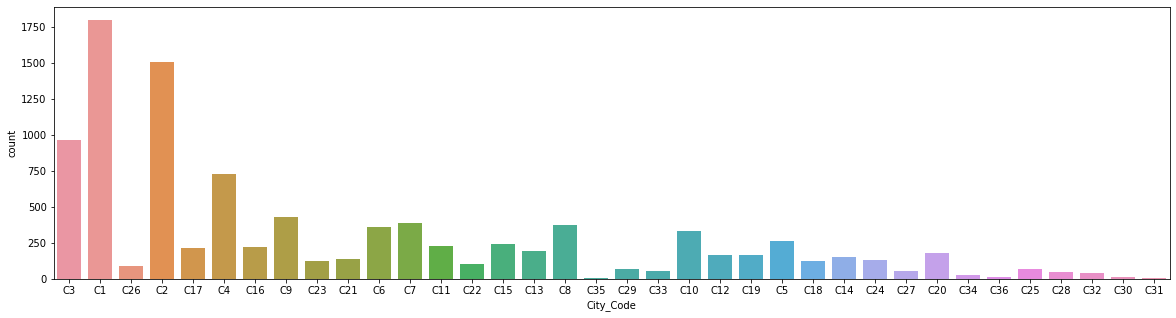

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['City_Code'])
plt.show()

## Observations:

1. There are 36 city codes in the dataset.
2. There are more datapoints from C1, C2, C3, C4 city codes.

#### Let's see city-wise customers interests in recommended policy

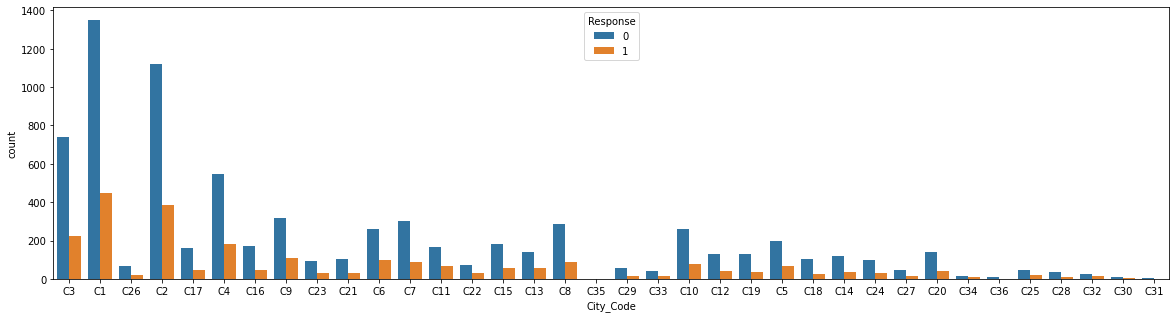

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['City_Code'],hue=final_df['Response'])
plt.show()

## Observations:

The response of cusomers interest in recommended policy is as shown above.

### As there are 36 unique values in city code, I grouped those 36 values into four groups (C1-C9),(C10-C18),(C19-C27) and (C28-C36)

In [21]:
def city_code(x):
    if x in ['C1','C2','C3','C4','C5','C6','C7','C8','C9']:
        return 'C1-C9'
    elif x in ['C10','C11','C12','C13','C14','C15','C16','C17','C18']:
        return 'C10-C18'
    elif x in ['C19','C20','C21','C22','C23','C24','C25','C26','C27']:
        return 'C19-C27'
    else:
        return 'C28-C36'

In [22]:
final_df['City_Code']=final_df['City_Code'].apply(lambda x: city_code(x))

In [23]:
final_df['City_Code'].value_counts()

C1-C9      6808
C10-C18    1876
C19-C27    1049
C28-C36     267
Name: City_Code, dtype: int64

<AxesSubplot:xlabel='City_Code', ylabel='count'>

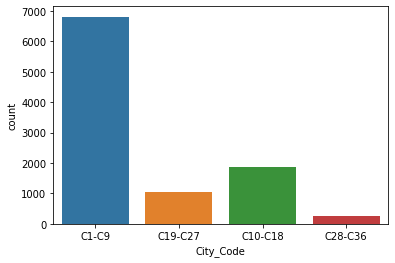

In [24]:
sns.countplot(final_df['City_Code'])

<AxesSubplot:xlabel='City_Code', ylabel='count'>

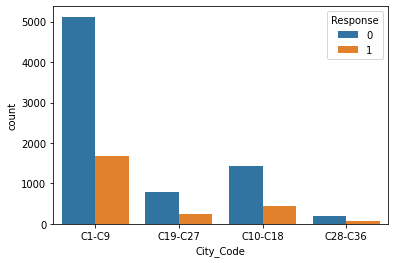

In [25]:
sns.countplot(final_df['City_Code'],hue=final_df['Response'])

## Observations:
The above two plots shows response of customers based on city codes after grouping.

### Region Code
#### Let's see the number of regions and region-wise customer interests in recommended policy.

In [26]:
print('no of Regions in the dataframe : ',final_df['Region_Code'].nunique())
print()
final_df['Region_Code'].value_counts()

no of Regions in the dataframe :  3726



1       23
6       18
4       18
7       17
30      15
        ..
3233     1
2765     1
2151     1
5170     1
714      1
Name: Region_Code, Length: 3726, dtype: int64

## Observations:

There are 3726 regioin codes in the dataset.

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

In [27]:
final_df['Accomodation_Type'].value_counts()   # here 1 means Owned house and 0 means Rented House

1    5509
0    4491
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

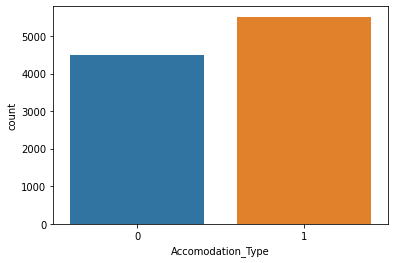

In [28]:
sns.countplot(final_df['Accomodation_Type'])

In [29]:
pd.crosstab(final_df['Accomodation_Type'],final_df['Response'])

Response,0,1
Accomodation_Type,,
0,3423,1068
1,4118,1391


<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

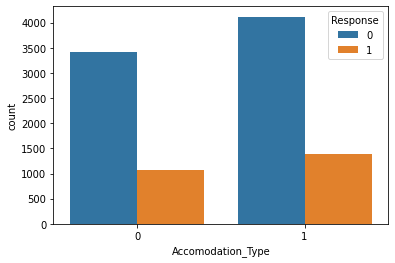

In [30]:
sns.countplot(final_df['Accomodation_Type'],hue=final_df['Response'])

## Observations:

1. There are more customers with owned housw than rented in the dataset.
2. from the above countplot, we can say that most customers didn't shown interest in the recommended policy.

#### Let's see the city-wise accomodation type and customer response

In [31]:
pd.crosstab(final_df['Response'],columns=[final_df['City_Code'],final_df['Accomodation_Type']]).T

Response                        0    1
City_Code Accomodation_Type           
C1-C9     0                  2180  698
          1                  2940  990
C10-C18   0                   781  234
          1                   645  216
C19-C27   0                   357  106
          1                   441  145
C28-C36   0                   105   30
          1                    92   40

<AxesSubplot:xlabel='City_Code,Accomodation_Type'>

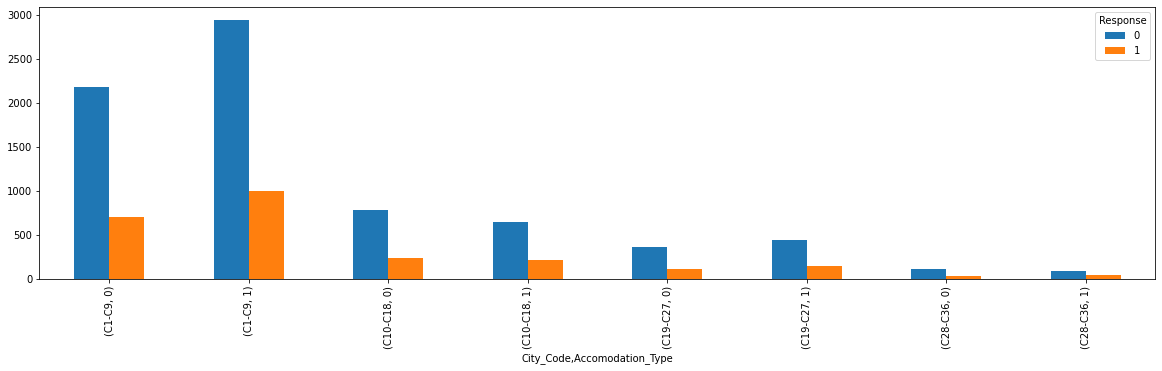

In [32]:
pd.crosstab(final_df['Response'],columns=[final_df['City_Code'],final_df['Accomodation_Type']]).T.plot(kind='bar',figsize=(20,5))

## Observations:

1. customers that shown interested and notinterested are more from city codes C1-C9.

### Reco Insurance Type
#### Let's see the various recommended insurance types and customer response to them.

In [33]:
pd.crosstab(final_df['Reco_Insurance_Type'],final_df['Response'])

Response,0,1
Reco_Insurance_Type,,
0,1509,535
1,6032,1924


<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

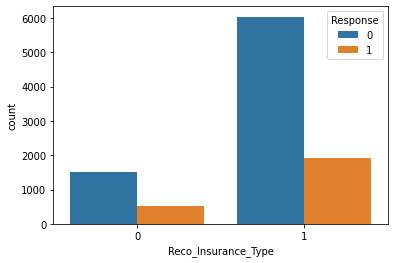

In [34]:
sns.countplot(final_df['Reco_Insurance_Type'],hue=final_df['Response'])

#### Let's see customers accommodation, recommended insurance type and customer responses.

In [35]:
pd.crosstab(index=[final_df['Accomodation_Type'],final_df['Reco_Insurance_Type']],columns=final_df['Response'])

Response                                  0    1
Accomodation_Type Reco_Insurance_Type           
0                 0                     380  139
                  1                    3043  929
1                 0                    1129  396
                  1                    2989  995

<AxesSubplot:xlabel='Accomodation_Type,Reco_Insurance_Type'>

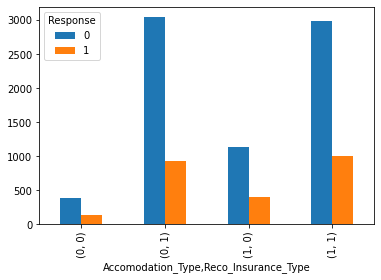

In [36]:
pd.crosstab(index=[final_df['Accomodation_Type'],final_df['Reco_Insurance_Type']],columns=final_df['Response']).plot(kind='bar')

### Recommended Policy Category
#### Let's see how many categories under the type of recommended policies.

In [37]:
print('Number of Recommended Policy Categories : ',final_df['Reco_Policy_Cat'].nunique())

Number of Recommended Policy Categories :  22


In [38]:
final_df['Reco_Policy_Cat'].unique()

array([16, 19, 17, 21,  9, 18, 13, 15, 14, 22, 20,  5, 12,  6,  4,  1,  3,
       11,  8,  2,  7, 10], dtype=int64)

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

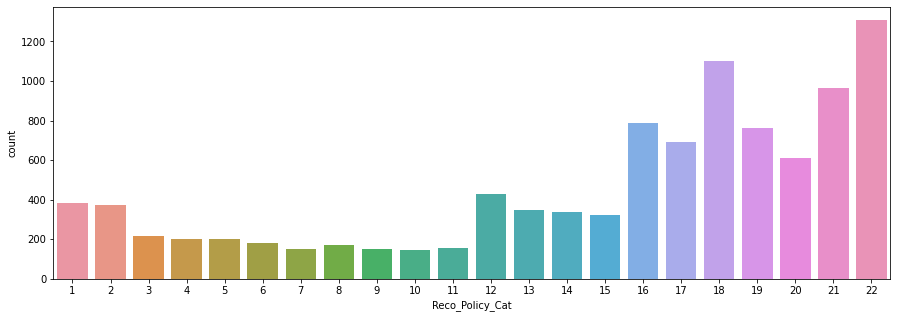

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(final_df['Reco_Policy_Cat'])

## Observations:

There are more customers in between Reco_Policy_Cat 16 and Reco_Policy_Cat 22.

### Recommended Policy Premium
#### Let's see if there is a relationship between the recommended policy premium and recommended policy category.Analyse results with customer's holding policy type and their response to recommended policy.

In [40]:
avg_premium=final_df.groupby(final_df['Reco_Policy_Cat'])[['Reco_Policy_Premium']].mean()
avg_premium

,Reco_Policy_Premium
Reco_Policy_Cat,
1,12915.944357
2,13231.982306
3,15390.644240
4,12157.566000
5,16142.542157
6,13193.164444
7,15231.881046
8,14319.471765
9,13699.385333


<AxesSubplot:xlabel='Reco_Policy_Cat'>

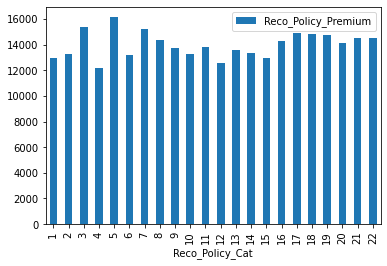

In [41]:
avg_premium.plot(kind='bar')

Text(0, 0.5, 'Average Recommended plocy premium')

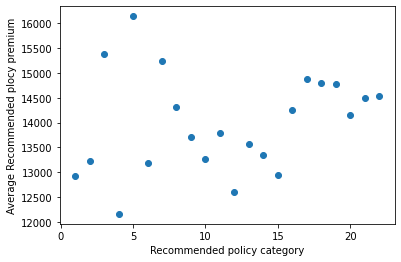

In [42]:
plt.scatter(avg_premium.index,avg_premium.values)
plt.xlabel('Recommended policy category')
plt.ylabel('Average Recommended plocy premium')

<AxesSubplot:xlabel='Reco_Policy_Cat'>

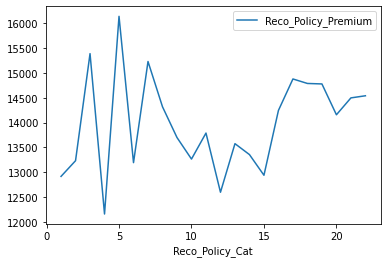

In [43]:
avg_premium.plot(kind='line')

## Observations:

There is relationship between Reco_Policy_Cat and Reco_Policy_Premium.

In [44]:
pd.crosstab(final_df['Holding_Policy_Type'],final_df['Response'])

Response,0,1
Holding_Policy_Type,,
1.0,1212,390
2.0,730,243
3.0,5037,1590
4.0,562,236


<AxesSubplot:xlabel='Holding_Policy_Type'>

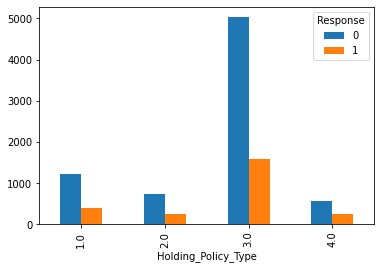

In [45]:
pd.crosstab(final_df['Holding_Policy_Type'],final_df['Response']).plot(kind='bar')

## Observations:

There are more customers from Holding_Policy_Type 3 , who didn't showed interest in Recommended Policy.

#### Let's see which type of recommnded policy has more number of customers

In [46]:
final_df['Reco_Policy_Cat'].value_counts()

22    1308
18    1102
21     966
16     786
19     764
17     694
20     612
12     431
1      381
2      373
13     348
14     336
15     323
3      217
5      204
4      200
6      180
8      170
11     155
7      153
9      150
10     147
Name: Reco_Policy_Cat, dtype: int64

In [47]:
print('Recommended policy category {} has more number of customers with {}'.format(final_df['Reco_Policy_Cat'].value_counts().idxmax(),final_df['Reco_Policy_Cat'].value_counts().max()))

Recommended policy category 22 has more number of customers with 1308


In [48]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Response'])

Response,0,1
Reco_Policy_Cat,,
1,378,3
2,324,49
3,173,44
4,182,18
5,150,54
6,154,26
7,123,30
8,137,33
9,123,27


<AxesSubplot:xlabel='Reco_Policy_Cat'>

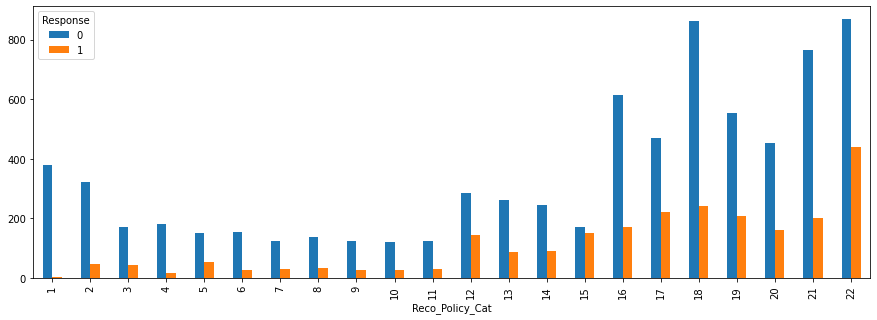

In [49]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Response']).plot(kind='bar',figsize=(15,5))

## Observations:

1. Category 1 policy are mostly rejeted by those customers.
2. Category 15 policies are accepted by nearly 50 % of those customers.
3. Remaining Categories are rejected by most customers than those who accepted those policy.

#### Let's see city-wise recommended insurance types to customers and theirresponses to recommended policy.

In [50]:
pd.crosstab(index=[final_df['City_Code'],final_df['Reco_Insurance_Type']],columns=final_df['Response'])

Response                          0     1
City_Code Reco_Insurance_Type            
C1-C9     0                    1056   372
          1                    4064  1316
C10-C18   0                     271    95
          1                    1155   355
C19-C27   0                     141    50
          1                     657   201
C28-C36   0                      41    18
          1                     156    52

<AxesSubplot:xlabel='City_Code,Reco_Insurance_Type'>

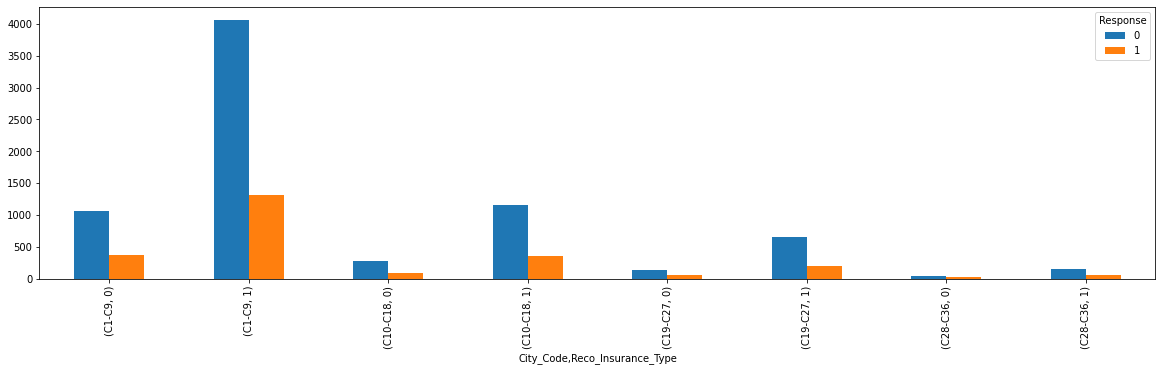

In [51]:
pd.crosstab(columns=final_df['Response'],index=[final_df['City_Code'],final_df['Reco_Insurance_Type']]).plot(kind='bar',figsize=(20,5))

## Observations:

1. There are more number of customers with individual recommended insurance type in city codes C1 - C9.
2. The response of the customers based on city codes and recommended insurance types is as shown above.

#### Let's analyze the customer's upper age with their type of accommodation and recommended policy types to them and also their interest in the recommended policy.


In [52]:
pd.crosstab(final_df['Accomodation_Type'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Accomodation_Type,,,,,,,,,,,,,,,,,,,,,
0,24,101,129,221,240,247,252,240,201,173,...,32,24,26,23,28,16,25,17,15,109
1,5,12,21,31,56,59,64,70,88,79,...,106,109,80,97,106,102,74,85,70,441


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

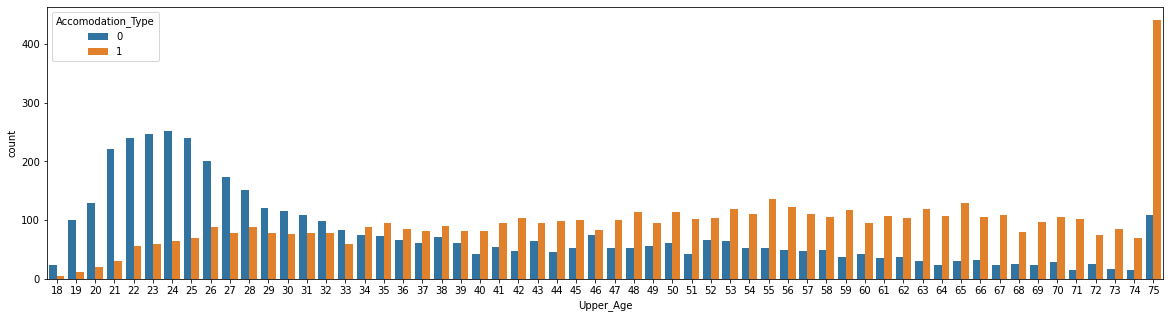

In [53]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['Upper_Age'],hue=final_df['Accomodation_Type'])

In [54]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Reco_Policy_Cat,,,,,,,,,,,,,,,,,,,,,
1,0,2,7,8,10,16,12,9,6,14,...,2,4,1,2,4,2,2,3,2,18
2,8,5,5,9,11,16,11,9,10,6,...,3,1,1,2,6,1,3,1,1,16
3,0,0,4,5,5,9,4,8,2,4,...,1,5,3,5,0,0,4,1,7,14
4,0,2,3,10,12,5,9,10,8,2,...,2,1,2,3,1,1,0,2,1,4
5,0,2,0,1,1,5,6,7,3,8,...,3,4,4,5,5,7,0,5,3,21
6,0,6,5,9,6,6,8,3,4,2,...,0,1,1,1,0,4,0,2,1,8
7,0,2,0,1,6,5,3,3,5,2,...,5,7,2,1,1,2,4,3,6,12
8,0,0,5,3,9,8,4,5,5,3,...,4,2,4,2,3,4,0,0,2,10
9,0,0,3,4,5,5,6,4,4,7,...,2,1,1,2,1,0,2,1,1,4


In [55]:
pd.crosstab(final_df['Response'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Response,,,,,,,,,,,,,,,,,,,,,
0,24,91,116,192,232,240,243,230,217,189,...,96,103,80,82,97,88,81,73,74,413
1,5,22,34,60,64,66,73,80,72,63,...,42,30,26,38,37,30,18,29,11,137


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

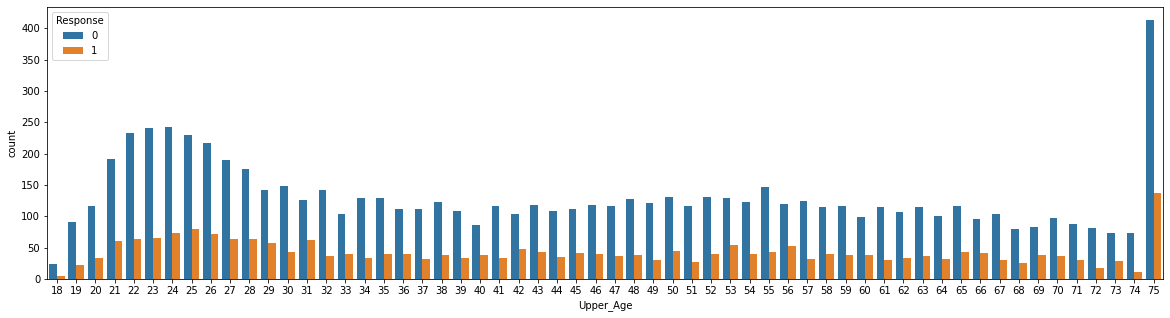

In [56]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['Upper_Age'],hue=final_df['Response'])

#### Let's see city-wise the customers who have recommended to take the joint policy with their spouse or with other customers. Check these results with the customer's type of accommodation.

In [57]:
final_df[final_df['Reco_Insurance_Type']==0]['City_Code'].value_counts()

C1-C9      1428
C10-C18     366
C19-C27     191
C28-C36      59
Name: City_Code, dtype: int64

In [58]:
pd.crosstab(final_df[final_df['Reco_Insurance_Type']==0]['Response'],final_df[final_df['Reco_Insurance_Type']==0]['City_Code'])

City_Code,C1-C9,C10-C18,C19-C27,C28-C36
Response,,,,
0,1056,271,141,41
1,372,95,50,18


<AxesSubplot:xlabel='City_Code'>

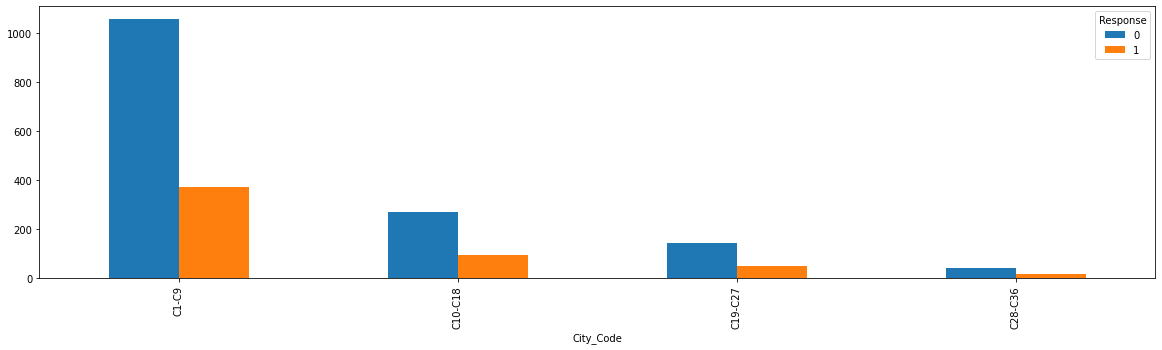

In [59]:
pd.crosstab(final_df[final_df['Reco_Insurance_Type']==0]['City_Code'],
            final_df[final_df['Reco_Insurance_Type']==0]['Response']).plot(kind='bar',figsize=(20,5))

In [60]:
final_df['Age']=(final_df['Upper_Age']+final_df['Lower_Age'])/2

In [61]:
def policy_category(x):
    if x>=1 and x<=5:
        return '1-5'
    elif x>5 and x<=11:
        return '6-11'
    elif x>11 and x<=15:
        return '12-15'
    else:
        return '16-22'

In [62]:
final_df['Reco_Policy_Cat']=final_df['Reco_Policy_Cat'].apply(lambda x: policy_category(x))

In [63]:
Q1,Q3 = np.percentile(final_df['Reco_Policy_Premium'],[25,75])
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
final_df['Reco_Policy_Premium']=final_df['Reco_Policy_Premium'].apply(lambda x: UB if x>UB else x)

<AxesSubplot:xlabel='Reco_Policy_Premium'>

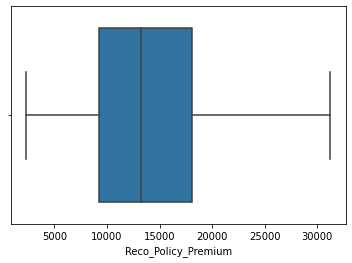

In [64]:
sns.boxplot(final_df['Reco_Policy_Premium'])

In [65]:
final_df['Holding_Policy_Type']=final_df['Holding_Policy_Type'].astype('category')
final_df['Reco_Policy_Cat']=final_df['Reco_Policy_Cat'].astype('category')

In [66]:
final_df=pd.concat([final_df,pd.get_dummies(final_df[['City_Code','Holding_Policy_Type','Reco_Policy_Cat']],drop_first=True)],axis=1)

In [67]:
final_df.drop(['City_Code','Region_Code','Holding_Policy_Type','Reco_Policy_Cat','Upper_Age','Lower_Age'],axis=1,inplace=True)

In [68]:
final_df.corr()

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,Response,X1,X2,X3,X4,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
Accomodation_Type,1.000000,-0.198900,0.201228,-0.005755,0.353815,0.016965,-0.034105,0.038888,-0.063311,0.056460,...,0.403172,-0.088828,0.005318,-0.018820,0.004731,-0.027561,0.090054,-0.045948,0.028540,0.011554
Reco_Insurance_Type,-0.198900,1.000000,-0.887177,0.013249,-0.585791,-0.018647,0.040732,-0.035448,0.047049,-0.026421,...,-0.099538,0.011087,0.018949,-0.006807,-0.005120,0.007636,-0.070361,0.009843,-0.012885,0.005233
Is_Spouse,0.201228,-0.887177,1.000000,-0.007911,0.509409,0.007075,-0.046082,0.045141,-0.060402,0.031452,...,0.125299,-0.022971,-0.020452,0.013418,-0.007811,0.004150,0.069827,-0.011331,0.018084,-0.001484
Holding_Policy_Duration,-0.005755,0.013249,-0.007911,1.000000,-0.033647,0.006420,0.001549,0.008583,0.008991,-0.019341,...,-0.036149,-0.033524,-0.013970,0.016888,-0.209263,0.498047,-0.152547,-0.002858,-0.002149,0.021292
Reco_Policy_Premium,0.353815,-0.585791,0.509409,-0.033647,1.000000,0.011012,-0.030865,0.040611,-0.047311,0.020886,...,0.723738,-0.055175,-0.045234,-0.046257,0.021967,-0.084427,0.115712,-0.069436,0.076480,-0.012469
Response,0.016965,-0.018647,0.007075,0.006420,0.011012,1.000000,-0.000446,0.011155,-0.009865,-0.000023,...,0.003930,-0.006727,-0.005266,0.006259,0.002930,-0.019441,0.034083,0.078357,0.053937,-0.048067
X1,-0.034105,0.040732,-0.046082,0.001549,-0.030865,-0.000446,1.000000,-0.493197,-0.385311,-0.342015,...,-0.018958,0.003080,-0.018117,-0.022970,0.032669,-0.011965,-0.012596,0.009752,-0.000909,-0.007354
X2,0.038888,-0.035448,0.045141,0.008583,0.040611,0.011155,-0.493197,1.000000,-0.198743,-0.176411,...,0.028935,-0.016215,0.003460,0.021371,-0.029643,0.025799,-0.021875,-0.032339,0.028818,0.010430
X3,-0.063311,0.047049,-0.060402,0.008991,-0.047311,-0.009865,-0.385311,-0.198743,1.000000,-0.137821,...,-0.029652,0.020927,0.007668,0.003847,0.016055,-0.002275,-0.047877,0.048239,-0.036048,-0.008332
X4,0.056460,-0.026421,0.031452,-0.019341,0.020886,-0.000023,-0.342015,-0.176411,-0.137821,1.000000,...,0.017341,-0.014371,0.001737,-0.008167,-0.022799,0.001125,0.069886,-0.042745,0.024972,-0.004471


<AxesSubplot:>

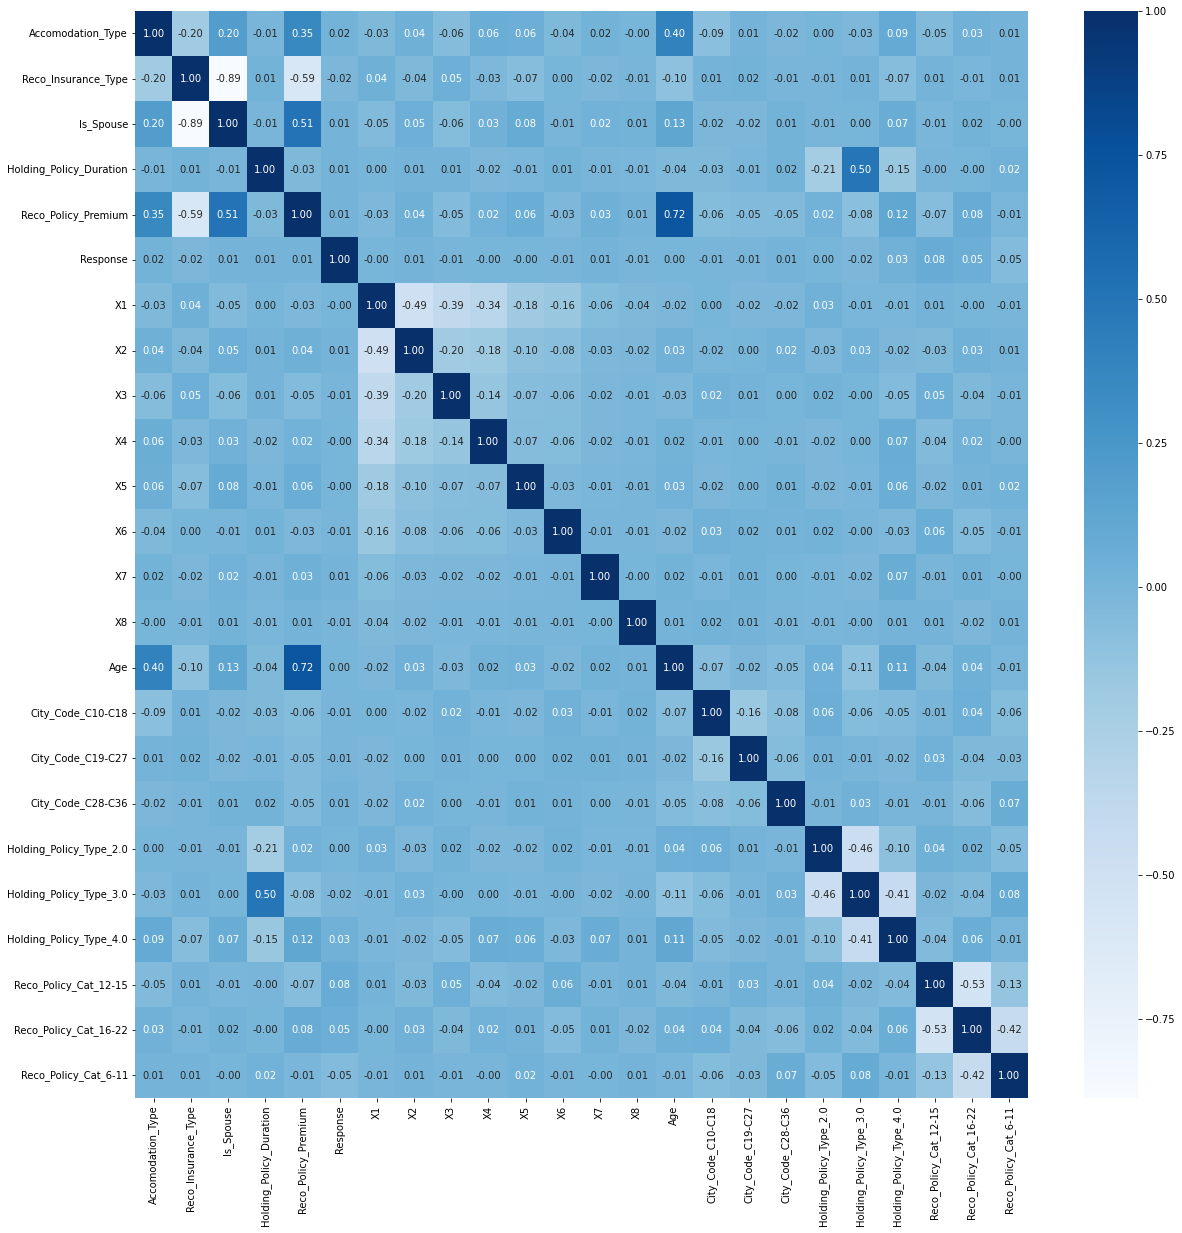

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True,cmap='Blues',fmt='.2f')

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [70]:
final_df['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [71]:
from imblearn.under_sampling import RandomUnderSampler

In [72]:
sampler=RandomUnderSampler()

In [73]:
X=final_df.drop('Response',axis=1)
y=final_df['Response']

In [74]:
print(X.shape,y.shape)

(10000, 23) (10000,)


In [75]:
predictor,response=sampler.fit_resample(X,y)

In [76]:
print(predictor.shape,response.shape)

(4918, 23) (4918,)


In [77]:
response.value_counts()

0    2459
1    2459
Name: Response, dtype: int64

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [78]:
predictor.head()

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,X5,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,1,0,1,5,12801.6,1.0,0.0,0.0,0.0,0.0,...,38.0,0,1,0,0,1,0,0,0,0
1,1,1,0,13,18150.0,1.0,0.0,0.0,0.0,0.0,...,75.0,0,0,0,0,1,0,0,1,0
2,0,1,0,15,12096.0,0.0,0.0,1.0,0.0,0.0,...,51.0,0,0,0,0,1,0,0,0,1
3,0,1,0,15,6940.0,0.0,1.0,0.0,0.0,0.0,...,24.0,0,0,0,0,1,0,0,1,0
4,0,1,0,1,12564.0,0.0,1.0,0.0,0.0,0.0,...,25.0,0,1,0,0,0,0,0,0,1


In [79]:
predictor.shape

(4918, 23)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler=StandardScaler()

In [82]:
predictor['Age']=scaler.fit_transform(predictor[['Age']])
predictor['Holding_Policy_Duration']=scaler.fit_transform(predictor[['Holding_Policy_Duration']])
predictor['Reco_Policy_Premium']=scaler.fit_transform(predictor[['Reco_Policy_Premium']])

In [83]:
predictor

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,X4,X5,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
0,1,0,1,-0.839518,-0.225169,1.0,0.0,0.0,0.0,0.0,...,-0.349812,0,1,0,0,1,0,0,0,0
1,1,1,0,0.570393,0.614723,1.0,0.0,0.0,0.0,0.0,...,1.839485,0,0,0,0,1,0,0,1,0
2,0,1,0,0.922871,-0.335973,0.0,0.0,1.0,0.0,0.0,...,0.419401,0,0,0,0,1,0,0,0,1
3,0,1,0,0.922871,-1.145651,0.0,1.0,0.0,0.0,0.0,...,-1.178194,0,0,0,0,1,0,0,1,0
4,0,1,0,-1.544473,-0.262481,0.0,1.0,0.0,0.0,0.0,...,-1.119024,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,1,1,0,0.746632,1.368496,0.0,0.0,0.0,1.0,0.0,...,1.484464,0,0,0,0,1,0,0,1,0
4914,1,1,0,-0.839518,-0.438989,1.0,0.0,0.0,0.0,0.0,...,-0.586492,0,0,0,0,1,0,0,1,0
4915,0,1,0,0.922871,-1.649423,0.0,1.0,0.0,0.0,0.0,...,-1.237364,0,1,0,0,1,0,0,1,0
4916,0,1,0,-0.487040,-0.075922,1.0,0.0,0.0,0.0,0.0,...,0.301061,0,1,0,0,1,0,1,0,0


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(predictor,response,test_size=0.2)

In [86]:
print(x_train.shape,x_test.shape)

(3934, 23) (984, 23)


In [87]:
print(y_train.shape,y_test.shape)

(3934,) (984,)


## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

In [88]:
performance_metrics_with_default_parameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=10000)

In [90]:
LR_model.fit(x_train,y_train)
print('Training Accuracy : ',LR_model.score(x_train,y_train))

Training Accuracy :  0.5749872902897813


In [91]:
y_pred=LR_model.predict(x_test)
print('Testing Accuracy : ',LR_model.score(x_test,y_test))

Testing Accuracy :  0.5589430894308943


In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [93]:
confusion_matrix(y_test,y_pred)

array([[240, 264],
       [170, 310]], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53       504
           1       0.54      0.65      0.59       480

    accuracy                           0.56       984
   macro avg       0.56      0.56      0.56       984
weighted avg       0.56      0.56      0.56       984


Accuracy is :  0.5589430894308943
Precission :  0.5400696864111498
Recall :  0.6458333333333334
f1-score :  0.5882352941176472
Roc Auc score :  0.5610119047619048


In [95]:
y_pred_proba = LR_model.predict_proba(x_test)[:,1]

In [96]:
from sklearn.metrics import roc_curve,auc
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5872209821428571


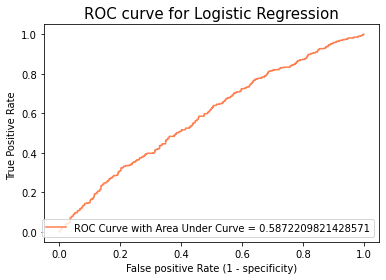

In [97]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [98]:
performance_metrics_with_default_parameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [99]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)

In [100]:
svm_model.fit(x_train,y_train)
print('Training Accuracy : ',svm_model.score(x_train,y_train))

Training Accuracy :  0.615912557193696


In [101]:
y_pred=svm_model.predict(x_test)
print('Testing Accuracy : ',svm_model.score(x_test,y_test))

Testing Accuracy :  0.5802845528455285


In [102]:
confusion_matrix(y_test,y_pred)

array([[240, 264],
       [149, 331]], dtype=int64)

In [103]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       504
           1       0.56      0.69      0.62       480

    accuracy                           0.58       984
   macro avg       0.59      0.58      0.58       984
weighted avg       0.59      0.58      0.58       984


Accuracy is :  0.5802845528455285
Precission :  0.5563025210084034
Recall :  0.6895833333333333
f1-score :  0.6158139534883721
Roc Auc score :  0.5828869047619047


In [104]:
y_pred_proba = svm_model.predict_proba(x_test)[:,1]

In [105]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6013372189153439


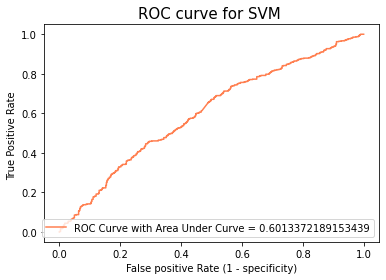

In [106]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [107]:
performance_metrics_with_default_parameters['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN 

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [109]:
knn_model.fit(x_train,y_train)
print('Training Accuracy : ',knn_model.score(x_train,y_train))

Training Accuracy :  0.7036095577020844


In [110]:
y_pred=knn_model.predict(x_test)
print('Testing Accuracy : ',knn_model.score(x_test,y_test))

Testing Accuracy :  0.5193089430894309


In [111]:
confusion_matrix(y_test,y_pred)

array([[260, 244],
       [229, 251]], dtype=int64)

In [112]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52       504
           1       0.51      0.52      0.51       480

    accuracy                           0.52       984
   macro avg       0.52      0.52      0.52       984
weighted avg       0.52      0.52      0.52       984


Accuracy is :  0.5193089430894309
Precission :  0.5070707070707071
Recall :  0.5229166666666667
f1-score :  0.514871794871795
Roc Auc score :  0.5193948412698413


In [113]:
y_pred_proba = knn_model.predict_proba(x_test)[:,1]

In [114]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5184275793650793


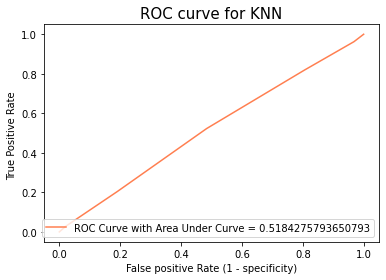

In [115]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [116]:
performance_metrics_with_default_parameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [118]:
dt_model.fit(x_train,y_train)
print('Training Accuracy : ',dt_model.score(x_train,y_train))

Training Accuracy :  0.9994916115912558


In [119]:
y_pred=dt_model.predict(x_test)
print('Testing Accuracy : ',dt_model.score(x_test,y_test))

Testing Accuracy :  0.5315040650406504


In [120]:
confusion_matrix(y_test,y_pred)

array([[275, 229],
       [232, 248]], dtype=int64)

In [121]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54       504
           1       0.52      0.52      0.52       480

    accuracy                           0.53       984
   macro avg       0.53      0.53      0.53       984
weighted avg       0.53      0.53      0.53       984


Accuracy is :  0.5315040650406504
Precission :  0.519916142557652
Recall :  0.5166666666666667
f1-score :  0.5182863113897596
Roc Auc score :  0.5311507936507938


In [122]:
y_pred_proba = dt_model.predict_proba(x_test)[:,1]

In [123]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5311507936507938


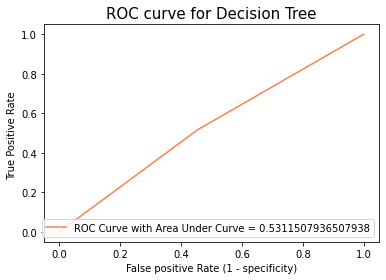

In [124]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [125]:
performance_metrics_with_default_parameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [127]:
rf_model.fit(x_train,y_train)
print('Training Accuracy : ',rf_model.score(x_train,y_train))

Training Accuracy :  0.9994916115912558


In [128]:
y_pred=rf_model.predict(x_test)
print('Testing Accuracy : ',rf_model.score(x_test,y_test))

Testing Accuracy :  0.540650406504065


In [129]:
confusion_matrix(y_test,y_pred)

array([[275, 229],
       [223, 257]], dtype=int64)

In [130]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       504
           1       0.53      0.54      0.53       480

    accuracy                           0.54       984
   macro avg       0.54      0.54      0.54       984
weighted avg       0.54      0.54      0.54       984


Accuracy is :  0.540650406504065
Precission :  0.5288065843621399
Recall :  0.5354166666666667
f1-score :  0.5320910973084886
Roc Auc score :  0.5405257936507937


In [131]:
y_pred_proba = rf_model.predict_proba(x_test)[:,1]

In [132]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.539308449074074


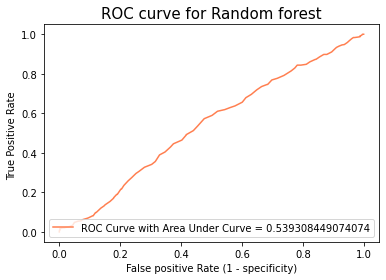

In [133]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [134]:
performance_metrics_with_default_parameters['Random Forest']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [135]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

In [136]:
adaboost.fit(x_train,y_train)
print('Training Accuracy : ',adaboost.score(x_train,y_train))

Training Accuracy :  0.5917641077783427


In [137]:
y_pred=adaboost.predict(x_test)
print('Testing Accuracy : ',adaboost.score(x_test,y_test))

Testing Accuracy :  0.5528455284552846


In [138]:
confusion_matrix(y_test,y_pred)

array([[263, 241],
       [199, 281]], dtype=int64)

In [139]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       504
           1       0.54      0.59      0.56       480

    accuracy                           0.55       984
   macro avg       0.55      0.55      0.55       984
weighted avg       0.55      0.55      0.55       984


Accuracy is :  0.5528455284552846
Precission :  0.5383141762452107
Recall :  0.5854166666666667
f1-score :  0.5608782435129741
Roc Auc score :  0.5536210317460317


In [140]:
y_pred_proba = adaboost.predict_proba(x_test)[:,1]

In [141]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5704179067460318


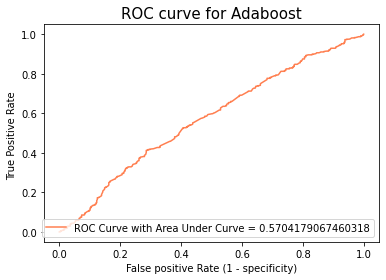

In [142]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboost',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [143]:
performance_metrics_with_default_parameters['Adaboosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()

In [145]:
gb_model.fit(x_train,y_train)
print('Training Accuracy : ',gb_model.score(x_train,y_train))

Training Accuracy :  0.6522623284189121


In [146]:
y_pred=gb_model.predict(x_test)
print('Testing Accuracy : ',gb_model.score(x_test,y_test))

Testing Accuracy :  0.5467479674796748


In [147]:
confusion_matrix(y_test,y_pred)

array([[239, 265],
       [181, 299]], dtype=int64)

In [148]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.47      0.52       504
           1       0.53      0.62      0.57       480

    accuracy                           0.55       984
   macro avg       0.55      0.55      0.55       984
weighted avg       0.55      0.55      0.54       984


Accuracy is :  0.5467479674796748
Precission :  0.5301418439716312
Recall :  0.6229166666666667
f1-score :  0.5727969348659003
Roc Auc score :  0.5485615079365079


In [149]:
y_pred_proba = gb_model.predict_proba(x_test)[:,1]

In [150]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5719494047619048


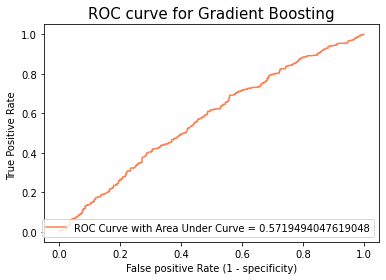

In [151]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient Boosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [152]:
performance_metrics_with_default_parameters['Gradient Boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# XGBoost

In [155]:
from xgboost import XGBClassifier
xgb_mode=XGBClassifier()

In [156]:
xgb_mode.fit(x_train,y_train)
print('Training Accuracy : ',xgb_mode.score(x_train,y_train))

[20:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy :  0.8957803762074225


In [157]:
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',xgb_mode.score(x_test,y_test))

Testing Accuracy :  0.5436991869918699


In [158]:
confusion_matrix(y_test,y_pred)

array([[265, 239],
       [210, 270]], dtype=int64)

In [159]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54       504
           1       0.53      0.56      0.55       480

    accuracy                           0.54       984
   macro avg       0.54      0.54      0.54       984
weighted avg       0.54      0.54      0.54       984


Accuracy is :  0.5436991869918699
Precission :  0.5304518664047151
Recall :  0.5625
f1-score :  0.5460060667340748
Roc Auc score :  0.5441468253968254


In [160]:
y_pred_proba = xgb_mode.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5746135085978836


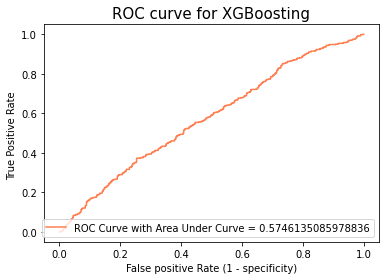

In [161]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for XGBoosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [162]:
performance_metrics_with_default_parameters['XGBoosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Comparing performance of all models

In [163]:
performance_metrics_with_default_parameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Adaboosting,Gradient Boosting,XGBoosting
Accuracy,0.558943,0.580285,0.519309,0.531504,0.540650,0.552846,0.546748,0.543699
Precision,0.540070,0.556303,0.507071,0.519916,0.528807,0.538314,0.530142,0.530452
Recall,0.645833,0.689583,0.522917,0.516667,0.535417,0.585417,0.622917,0.562500
F1_score,0.588235,0.615814,0.514872,0.518286,0.532091,0.560878,0.572797,0.546006
AUC,0.587221,0.601337,0.518428,0.531151,0.539308,0.570418,0.571949,0.574614


## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance


## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

# Hyperparamter tuning

In [164]:
performance_metrics_with_hyperparameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
h_params={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':np.linspace(0,1,100)}

In [167]:
rscv=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [168]:
results.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.8383838383838385}

In [169]:
results.best_score_

0.5587594802702859

## Building Logistic model with hyperparameters

In [170]:
LR_tuned_model=results.best_estimator_
LR_tuned_model.fit(x_train,y_train)
y_pred=LR_tuned_model.predict(x_test)
y_pred_proba=LR_tuned_model.predict_proba(x_test)[:,1]

In [171]:
confusion_matrix(y_test,y_pred)

array([[239, 265],
       [169, 311]], dtype=int64)

In [172]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52       504
           1       0.54      0.65      0.59       480

    accuracy                           0.56       984
   macro avg       0.56      0.56      0.56       984
weighted avg       0.56      0.56      0.56       984


Accuracy is :  0.5589430894308943
Precission :  0.5399305555555556
Recall :  0.6479166666666667
f1-score :  0.5890151515151515
Roc Auc score :  0.5610615079365079


In [173]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5872953869047619


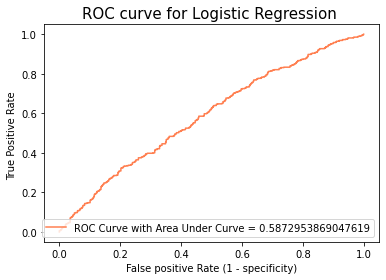

In [174]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [175]:
performance_metrics_with_hyperparameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [176]:
h_params={'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'gamma':['scale','auto'],'C':np.linspace(0,1,100)}

In [177]:
rscv=RandomizedSearchCV(estimator=SVC(probability=True),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [178]:
results.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 0.7676767676767677}

In [179]:
results.best_score_

0.5618136367019826

## Building SVM model with Hyperparameters

In [180]:
svm_tuned_model=results.best_estimator_
svm_tuned_model.fit(x_train,y_train)
y_pred=svm_tuned_model.predict(x_test)
y_pred_proba=svm_tuned_model.predict_proba(x_test)[:,1]

In [181]:
confusion_matrix(y_test,y_pred)

array([[153, 351],
       [ 99, 381]], dtype=int64)

In [182]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.30      0.40       504
           1       0.52      0.79      0.63       480

    accuracy                           0.54       984
   macro avg       0.56      0.55      0.52       984
weighted avg       0.56      0.54      0.51       984


Accuracy is :  0.5426829268292683
Precission :  0.5204918032786885
Recall :  0.79375
f1-score :  0.6287128712871287
Roc Auc score :  0.5486607142857143


In [183]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5821242559523809


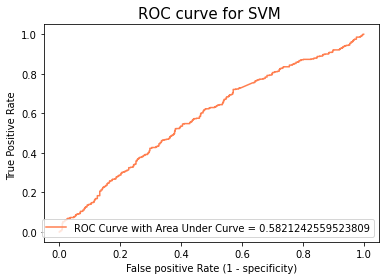

In [184]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [185]:
performance_metrics_with_hyperparameters['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [186]:
h_params={'n_neighbors':range(1,11,2),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}

In [187]:
rscv=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [188]:
results.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}

In [189]:
results.best_score_

0.5294851913422491

## Building knn model with hyperparameters

In [190]:
knn_tuned_model=results.best_estimator_
knn_tuned_model.fit(x_train,y_train)
y_pred=knn_tuned_model.predict(x_test)
y_pred_proba=knn_tuned_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[264, 240],
       [214, 266]], dtype=int64)

In [191]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54       504
           1       0.53      0.55      0.54       480

    accuracy                           0.54       984
   macro avg       0.54      0.54      0.54       984
weighted avg       0.54      0.54      0.54       984


Accuracy is :  0.5386178861788617
Precission :  0.525691699604743
Recall :  0.5541666666666667
f1-score :  0.5395537525354969
Roc Auc score :  0.5389880952380953


In [192]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5289351851851852


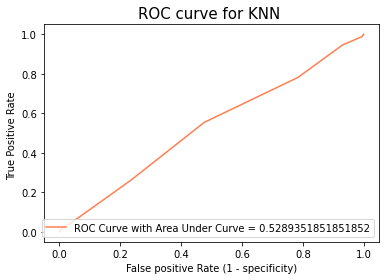

In [193]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [194]:
performance_metrics_with_hyperparameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [195]:
h_params={'criterion':["gini", "entropy"],
        'splitter':["best", "random"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [196]:
rscv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [197]:
results.best_params_

{'splitter': 'random',
 'min_samples_split': 20,
 'max_leaf_nodes': 30,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'entropy'}

In [198]:
results.best_score_

0.5406644666650126

## Building Decision Tree model with hyperparameters

In [199]:
dt_tuned_model=results.best_estimator_
dt_tuned_model.fit(x_train,y_train)
y_pred=dt_tuned_model.predict(x_test)
y_pred_proba=dt_tuned_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[177, 327],
       [131, 349]], dtype=int64)

In [200]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.35      0.44       504
           1       0.52      0.73      0.60       480

    accuracy                           0.53       984
   macro avg       0.55      0.54      0.52       984
weighted avg       0.55      0.53      0.52       984


Accuracy is :  0.5345528455284553
Precission :  0.5162721893491125
Recall :  0.7270833333333333
f1-score :  0.6038062283737025
Roc Auc score :  0.5391369047619047


In [201]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5467199900793651


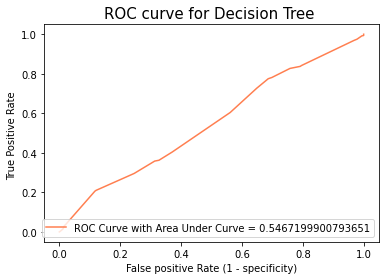

In [202]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [203]:
performance_metrics_with_hyperparameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [204]:
h_params={'n_estimators':[10,20,30,50,100,150,200],
        'criterion':["gini", "entropy"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [205]:
rscv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [206]:
results.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'entropy'}

In [207]:
results.best_score_

0.5646568907194667

## Building Random Forest model with hyperparameters

In [208]:
rf_tuned_model=results.best_estimator_
rf_tuned_model.fit(x_train,y_train)
y_pred=rf_tuned_model.predict(x_test)
y_pred_proba=rf_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[217, 287],
       [140, 340]], dtype=int64)

In [209]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.43      0.50       504
           1       0.54      0.71      0.61       480

    accuracy                           0.57       984
   macro avg       0.58      0.57      0.56       984
weighted avg       0.58      0.57      0.56       984


Accuracy is :  0.5660569105691057
Precission :  0.5422647527910686
Recall :  0.7083333333333334
f1-score :  0.6142728093947606
Roc Auc score :  0.5694444444444445


In [210]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5961330191798943


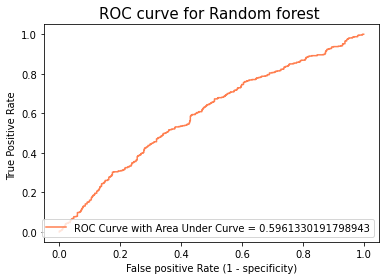

In [211]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [212]:
performance_metrics_with_hyperparameters['Random Forest']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [213]:
h_params={'n_estimators':[10,20,30,50,70],
        'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':[1,3,5,7,10,15,20],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60]}

In [214]:
rscv=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [215]:
results.best_params_

{'n_estimators': 10,
 'min_samples_split': 50,
 'max_leaf_nodes': 20,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'friedman_mse'}

In [216]:
results.best_score_

0.5648620036556419

## Building Gradient Boosting model with Hyperparameters

In [217]:
gd_tuned_model=results.best_estimator_
gd_tuned_model.fit(x_train,y_train)
y_pred=gd_tuned_model.predict(x_test)
y_pred_proba=gd_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[229, 275],
       [158, 322]], dtype=int64)

In [218]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51       504
           1       0.54      0.67      0.60       480

    accuracy                           0.56       984
   macro avg       0.57      0.56      0.56       984
weighted avg       0.57      0.56      0.55       984


Accuracy is :  0.5599593495934959
Precission :  0.5393634840871022
Recall :  0.6708333333333333
f1-score :  0.5979572887650881
Roc Auc score :  0.5625992063492063


In [219]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5977471891534392


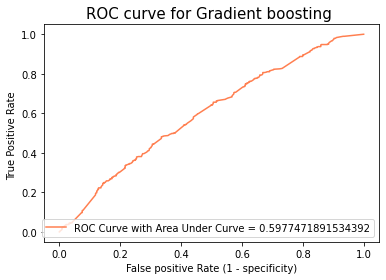

In [220]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient boosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [221]:
performance_metrics_with_hyperparameters['Gradient boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [222]:
h_params={'n_estimators':[10,20,30,50,70],
        'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,2,5],
        'algorithm' : ['SAMME', 'SAMME.R']}

In [223]:
rscv=RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [224]:
results.best_params_

{'n_estimators': 50, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}

In [225]:
results.best_score_

0.5677077388779992

## Building Adaboost model with Hyperparameters

In [226]:
ada_tuned_model=results.best_estimator_
ada_tuned_model.fit(x_train,y_train)
y_pred=ada_tuned_model.predict(x_test)
y_pred_proba=ada_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[239, 265],
       [160, 320]], dtype=int64)

In [227]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       504
           1       0.55      0.67      0.60       480

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.56       984


Accuracy is :  0.568089430894309
Precission :  0.5470085470085471
Recall :  0.6666666666666666
f1-score :  0.6009389671361502
Roc Auc score :  0.5704365079365079


In [228]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5831783234126984


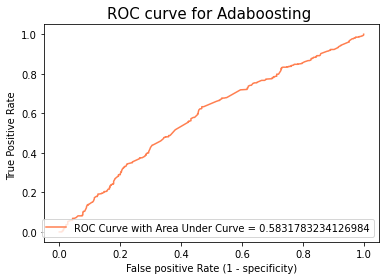

In [229]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [230]:
performance_metrics_with_hyperparameters['Adaboost']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# XGBoost

In [231]:
h_params={'n_estimators':[10,20,30,50,70],
          'max_depth':[1,3,5,7,10,15,20,25],
        'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,2,5],
         'reg_alpha':[1e-5,1e-2,0.1,0.5,0.05,1]}

In [232]:
rscv=RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

[20:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [233]:
results.best_params_

{'reg_alpha': 1e-05, 'n_estimators': 10, 'max_depth': 1, 'learning_rate': 0.5}

In [234]:
results.best_score_

0.5569314525800395

## Building XGBoost model with hyperparameters

In [235]:
xgb_tuned_model=results.best_estimator_
xgb_tuned_model.fit(x_train,y_train)
y_pred=xgb_tuned_model.predict(x_test)
y_pred_proba=xgb_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

[20:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[175, 329],
       [112, 368]], dtype=int64)

In [236]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.35      0.44       504
           1       0.53      0.77      0.63       480

    accuracy                           0.55       984
   macro avg       0.57      0.56      0.53       984
weighted avg       0.57      0.55      0.53       984


Accuracy is :  0.551829268292683
Precission :  0.5279770444763271
Recall :  0.7666666666666667
f1-score :  0.6253186066270179
Roc Auc score :  0.5569444444444445


In [237]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5815186838624339


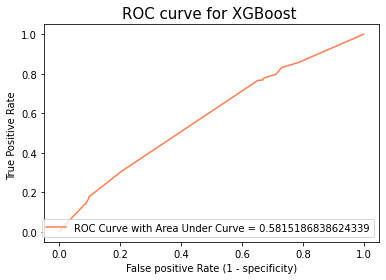

In [238]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for XGBoost ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [239]:
performance_metrics_with_hyperparameters['XGBoost']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Performance metrics with hyperparameters

In [240]:
performance_metrics_with_hyperparameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Gradient boosting,Adaboost,XGBoost
Accuracy,0.558943,0.542683,0.538618,0.534553,0.566057,0.559959,0.568089,0.551829
Precision,0.539931,0.520492,0.525692,0.516272,0.542265,0.539363,0.547009,0.527977
Recall,0.647917,0.793750,0.554167,0.727083,0.708333,0.670833,0.666667,0.766667
F1_score,0.589015,0.628713,0.539554,0.603806,0.614273,0.597957,0.600939,0.625319
AUC,0.587295,0.582124,0.528935,0.546720,0.596133,0.597747,0.583178,0.581519


## Feature Engineering and Remodeling  

#### To Do:

1. Perform the required Feature Engineering (Feature Selection using RFE, Feature Transformation, etc.)

2. Rebuild the models (Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc.

3. Compare the model (With Feature Engineering) Performance with previous model (Without Feature Engineering) 

In [241]:
from sklearn.feature_selection import RFE

In [242]:
performance_metrics_with_selected_features_and_hyperparameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [243]:
selector=RFE(estimator=LogisticRegression(max_iter=10000,solver='saga',penalty='l2',C=0.8383838383838385))
selector=selector.fit(predictor,response)
selected_features=predictor.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predictor[selected_features],response,test_size=0.2)

In [244]:
LR_final_model=LogisticRegression(max_iter=10000,solver='saga',penalty='l2',C=0.8383838383838385)
LR_final_model.fit(x_train,y_train)
y_pred=LR_final_model.predict(x_test)
y_pred_proba=LR_final_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[178, 317],
       [104, 385]], dtype=int64)

In [245]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.36      0.46       495
           1       0.55      0.79      0.65       489

    accuracy                           0.57       984
   macro avg       0.59      0.57      0.55       984
weighted avg       0.59      0.57      0.55       984


Accuracy is :  0.5721544715447154
Precission :  0.5484330484330484
Recall :  0.787321063394683
f1-score :  0.6465155331654072
Roc Auc score :  0.5734585114953212


In [246]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5841069178492492


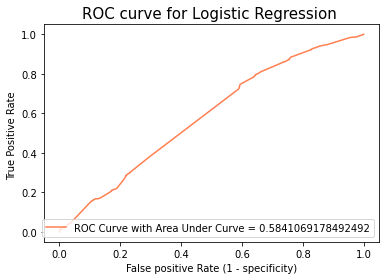

In [247]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [248]:
performance_metrics_with_selected_features_and_hyperparameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [249]:
selector=RFE(estimator=SVC(probability=True,kernel='linear',gamma='auto',C=0.9090909090909092),importance_getter='coef_')
selector=selector.fit(predictor,response)
selected_features=predictor.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predictor[selected_features],response,test_size=0.2)

In [250]:
svm_final_model=SVC(probability=True,kernel='linear',gamma='auto',C=0.9090909090909092)
svm_final_model.fit(x_train,y_train)
y_pred=svm_final_model.predict(x_test)
y_pred_proba=svm_final_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[129, 366],
       [ 68, 421]], dtype=int64)

In [251]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.26      0.37       495
           1       0.53      0.86      0.66       489

    accuracy                           0.56       984
   macro avg       0.59      0.56      0.52       984
weighted avg       0.60      0.56      0.52       984


Accuracy is :  0.5589430894308943
Precission :  0.5349428208386277
Recall :  0.8609406952965235
f1-score :  0.6598746081504703
Roc Auc score :  0.560773377951292


In [252]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5550122905951127


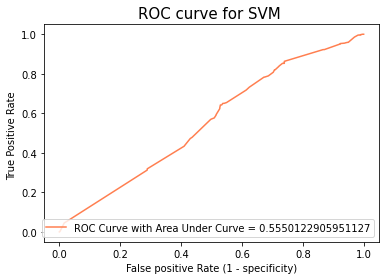

In [253]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [254]:
performance_metrics_with_selected_features_and_hyperparameters['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [255]:
knn_final_model=KNeighborsClassifier(weights='distance',n_neighbors=9,metric='euclidean')
knn_final_model.fit(x_train,y_train)
y_pred=knn_final_model.predict(x_test)
y_pred_proba=knn_final_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[213, 282],
       [156, 333]], dtype=int64)

In [256]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.43      0.49       495
           1       0.54      0.68      0.60       489

    accuracy                           0.55       984
   macro avg       0.56      0.56      0.55       984
weighted avg       0.56      0.55      0.55       984


Accuracy is :  0.5548780487804879
Precission :  0.5414634146341464
Recall :  0.6809815950920245
f1-score :  0.6032608695652174
Roc Auc score :  0.5556423126975274


In [257]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5681208816178142


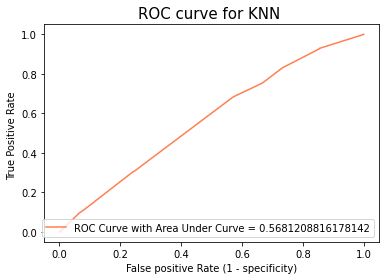

In [258]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [259]:
performance_metrics_with_selected_features_and_hyperparameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [260]:
selector=RFE(estimator=DecisionTreeClassifier(splitter= 'random',
                                     min_samples_split= 20,
                                     max_leaf_nodes=30,
                                     max_features= 'sqrt',
                                     max_depth=15,
                                     criterion= 'entropy'))
selector=selector.fit(predictor,response)
selected_features=predictor.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predictor[selected_features],response,test_size=0.2)

In [261]:
dt_final_model=DecisionTreeClassifier(splitter= 'random',
                                     min_samples_split= 20,
                                     max_leaf_nodes=30,
                                     max_features= 'sqrt',
                                     max_depth=15,
                                     criterion= 'entropy')
dt_final_model.fit(x_train,y_train)
y_pred=dt_final_model.predict(x_test)
y_pred_proba=dt_final_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[244, 242],
       [232, 266]], dtype=int64)

In [262]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       486
           1       0.52      0.53      0.53       498

    accuracy                           0.52       984
   macro avg       0.52      0.52      0.52       984
weighted avg       0.52      0.52      0.52       984


Accuracy is :  0.5182926829268293
Precission :  0.5236220472440944
Recall :  0.5341365461847389
f1-score :  0.5288270377733598
Roc Auc score :  0.5180970796767316


In [263]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5082242550448708


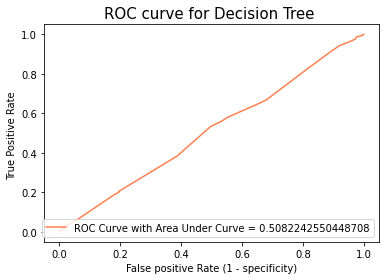

In [264]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [265]:
performance_metrics_with_selected_features_and_hyperparameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [266]:
selector=RFE(estimator=RandomForestClassifier(n_estimators= 20,
                                     min_samples_split=5,
                                     max_leaf_nodes=80,
                                     max_features= 'auto',
                                     max_depth=20,
                                     criterion= 'gini'))
selector=selector.fit(predictor,response)
selected_features=predictor.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predictor[selected_features],response,test_size=0.2)

In [267]:
rf_final_model=RandomForestClassifier(n_estimators= 20,
                                     min_samples_split=5,
                                     max_leaf_nodes=80,
                                     max_features= 'auto',
                                     max_depth=20,
                                     criterion= 'gini')
rf_final_model.fit(x_train,y_train)
y_pred=rf_final_model.predict(x_test)
y_pred_proba=rf_final_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[271, 228],
       [201, 284]], dtype=int64)

In [268]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56       499
           1       0.55      0.59      0.57       485

    accuracy                           0.56       984
   macro avg       0.56      0.56      0.56       984
weighted avg       0.56      0.56      0.56       984


Accuracy is :  0.5640243902439024
Precission :  0.5546875
Recall :  0.5855670103092784
f1-score :  0.5697091273821464
Roc Auc score :  0.5643265913269839


In [269]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5763010557196868


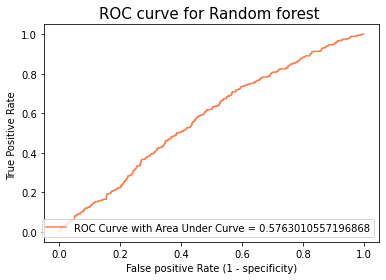

In [270]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [271]:
performance_metrics_with_selected_features_and_hyperparameters['Random Forest']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [272]:
selector=RFE(estimator=GradientBoostingClassifier(n_estimators= 50,
                                             min_samples_split= 10,
                                             max_leaf_nodes= 10,
                                             max_features= 'auto',
                                             max_depth= 20,
                                             criterion= 'mse'))
selector=selector.fit(predictor,response)
selected_features=predictor.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predictor[selected_features],response,test_size=0.2)

In [273]:
gd_final_model=GradientBoostingClassifier(n_estimators= 50,
                                             min_samples_split= 10,
                                             max_leaf_nodes= 10,
                                             max_features= 'auto',
                                             max_depth= 20,
                                             criterion= 'mse')
gd_final_model.fit(x_train,y_train)
y_pred=gd_final_model.predict(x_test)
y_pred_proba=gd_final_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[241, 263],
       [149, 331]], dtype=int64)

In [274]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       504
           1       0.56      0.69      0.62       480

    accuracy                           0.58       984
   macro avg       0.59      0.58      0.58       984
weighted avg       0.59      0.58      0.58       984


Accuracy is :  0.5813008130081301
Precission :  0.5572390572390572
Recall :  0.6895833333333333
f1-score :  0.6163873370577281
Roc Auc score :  0.5838789682539682


In [275]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6247416501322751


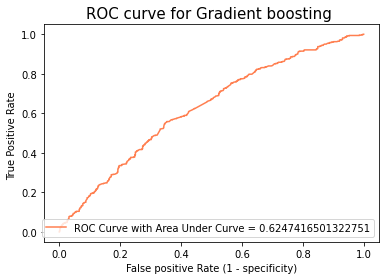

In [276]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient boosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [277]:
performance_metrics_with_selected_features_and_hyperparameters['Gradient boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Adaboost

In [278]:
selector=RFE(estimator=AdaBoostClassifier(n_estimators= 50, learning_rate= 0.5, algorithm= 'SAMME.R'))
selector=selector.fit(predictor,response)
selected_features=predictor.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predictor[selected_features],response,test_size=0.2)

In [279]:
ada_final_model=AdaBoostClassifier(n_estimators= 50, learning_rate= 0.5, algorithm= 'SAMME.R')
ada_final_model.fit(x_train,y_train)
y_pred=ada_final_model.predict(x_test)
y_pred_proba=ada_final_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[248, 254],
       [171, 311]], dtype=int64)

In [280]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.49      0.54       502
           1       0.55      0.65      0.59       482

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.568089430894309
Precission :  0.5504424778761062
Recall :  0.6452282157676349
f1-score :  0.5940783190066858
Roc Auc score :  0.5696260600750525


In [281]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5942578234778727


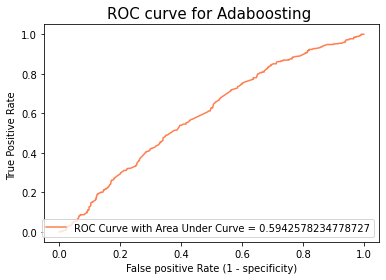

In [282]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [283]:
performance_metrics_with_selected_features_and_hyperparameters['Adaboost']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# XGBoost

In [284]:
selector=RFE(estimator=XGBClassifier(reg_alpha=1e-05, n_estimators= 10,max_depth =1, learning_rate= 0.5))
selector=selector.fit(predictor,response)
selected_features=predictor.columns[np.where(selector.get_support()==True)]
x_train,x_test,y_train,y_test=train_test_split(predictor[selected_features],response,test_size=0.2)

[20:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [285]:
xgb_tuned_model=XGBClassifier(reg_alpha=1e-05, n_estimators= 10,max_depth =1, learning_rate= 0.5)
xgb_tuned_model.fit(x_train,y_train)
y_pred=xgb_tuned_model.predict(x_test)
y_pred_proba=xgb_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

[20:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[197, 287],
       [140, 360]], dtype=int64)

In [286]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.41      0.48       484
           1       0.56      0.72      0.63       500

    accuracy                           0.57       984
   macro avg       0.57      0.56      0.55       984
weighted avg       0.57      0.57      0.56       984


Accuracy is :  0.5660569105691057
Precission :  0.5564142194744977
Recall :  0.72
f1-score :  0.6277244986922407
Roc Auc score :  0.5635123966942148


In [287]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5883243801652892


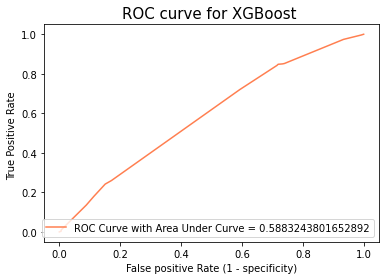

In [288]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for XGBoost ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [289]:
performance_metrics_with_selected_features_and_hyperparameters['XGBoost']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

In [290]:
performance_metrics_with_default_parameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Adaboosting,Gradient Boosting,XGBoosting
Accuracy,0.558943,0.580285,0.519309,0.531504,0.540650,0.552846,0.546748,0.543699
Precision,0.540070,0.556303,0.507071,0.519916,0.528807,0.538314,0.530142,0.530452
Recall,0.645833,0.689583,0.522917,0.516667,0.535417,0.585417,0.622917,0.562500
F1_score,0.588235,0.615814,0.514872,0.518286,0.532091,0.560878,0.572797,0.546006
AUC,0.587221,0.601337,0.518428,0.531151,0.539308,0.570418,0.571949,0.574614


In [291]:
performance_metrics_with_hyperparameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Gradient boosting,Adaboost,XGBoost
Accuracy,0.558943,0.542683,0.538618,0.534553,0.566057,0.559959,0.568089,0.551829
Precision,0.539931,0.520492,0.525692,0.516272,0.542265,0.539363,0.547009,0.527977
Recall,0.647917,0.793750,0.554167,0.727083,0.708333,0.670833,0.666667,0.766667
F1_score,0.589015,0.628713,0.539554,0.603806,0.614273,0.597957,0.600939,0.625319
AUC,0.587295,0.582124,0.528935,0.546720,0.596133,0.597747,0.583178,0.581519


In [292]:
performance_metrics_with_selected_features_and_hyperparameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Gradient boosting,Adaboost,XGBoost
Accuracy,0.572154,0.558943,0.554878,0.518293,0.564024,0.581301,0.568089,0.566057
Precision,0.548433,0.534943,0.541463,0.523622,0.554688,0.557239,0.550442,0.556414
Recall,0.787321,0.860941,0.680982,0.534137,0.585567,0.689583,0.645228,0.720000
F1_score,0.646516,0.659875,0.603261,0.528827,0.569709,0.616387,0.594078,0.627724
AUC,0.584107,0.555012,0.568121,0.508224,0.576301,0.624742,0.594258,0.588324


# Over sampling

In [293]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()

In [294]:
X=final_df.drop('Response',axis=1)
y=final_df['Response']

In [295]:
predictor,response=sampler.fit_resample(X,y)

In [296]:
print(predictor.shape,response.shape)

(15082, 23) (15082,)


In [297]:
predictor['Age']=scaler.fit_transform(predictor[['Age']])
predictor['Holding_Policy_Duration']=scaler.fit_transform(predictor[['Holding_Policy_Duration']])
predictor['Reco_Policy_Premium']=scaler.fit_transform(predictor[['Reco_Policy_Premium']])

In [298]:
x_train,x_test,y_train,y_test=train_test_split(predictor,response,test_size=0.2)

In [299]:
Performance_with_over_sampled_data=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [300]:
LR_model=LogisticRegression(max_iter=10000)
LR_model.fit(x_train,y_train)
print('Training Accuracy : ',LR_model.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',LR_model.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

Training Accuracy :  0.6949854952341483
Testing Accuracy :  0.6987073251574412


array([[871, 599],
       [724, 823]], dtype=int64)

In [301]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1470
           1       0.58      0.53      0.55      1547

    accuracy                           0.56      3017
   macro avg       0.56      0.56      0.56      3017
weighted avg       0.56      0.56      0.56      3017


Accuracy is :  0.5614849187935035
Precission :  0.5787623066104078
Recall :  0.5319974143503555
f1-score :  0.5543954193331088
Roc Auc score :  0.5622572105765382


In [302]:
y_pred_proba = LR_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.7639877929193656


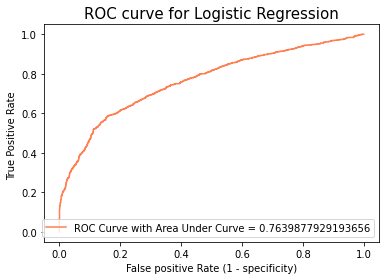

In [303]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter Tuning

In [304]:
h_params={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':np.linspace(0,1,100)}
rscv=RandomizedSearchCV(estimator=LogisticRegression(max_iter=10000),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1,n_jobs=-1)
results=rscv.fit(predictor,response)

In [305]:
lg_tuned_model=results.best_estimator_
lg_tuned_model.fit(x_train,y_train)
y_pred=lg_tuned_model.predict(x_test)
y_pred_proba=lg_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[1068,  402],
       [ 508, 1039]], dtype=int64)

In [306]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1470
           1       0.72      0.67      0.70      1547

    accuracy                           0.70      3017
   macro avg       0.70      0.70      0.70      3017
weighted avg       0.70      0.70      0.70      3017


Accuracy is :  0.6983758700696056
Precission :  0.721027064538515
Recall :  0.6716224951519069
f1-score :  0.6954484605087015
Roc Auc score :  0.6990765536984025


Area under the ROC curve :  0.7638593899098101


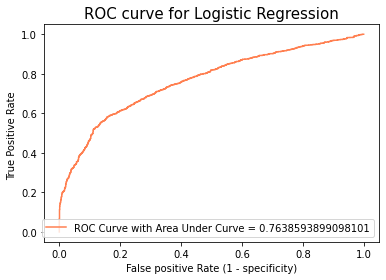

In [307]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [308]:
Performance_with_over_sampled_data['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [309]:
svm_model=SVC(probability=True)
svm_model.fit(x_train,y_train)
print('Training Accuracy : ',svm_model.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',svm_model.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

Training Accuracy :  0.7631164525486945
Testing Accuracy :  0.7596950613191913


array([[871, 599],
       [724, 823]], dtype=int64)

In [310]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1470
           1       0.58      0.53      0.55      1547

    accuracy                           0.56      3017
   macro avg       0.56      0.56      0.56      3017
weighted avg       0.56      0.56      0.56      3017


Accuracy is :  0.5614849187935035
Precission :  0.5787623066104078
Recall :  0.5319974143503555
f1-score :  0.5543954193331088
Roc Auc score :  0.5622572105765382


In [311]:
y_pred_proba = svm_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8214850775475024


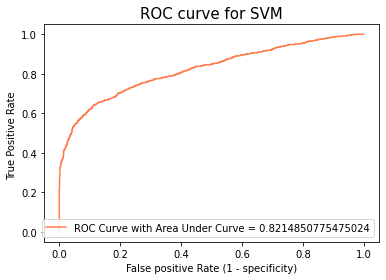

In [312]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [313]:
Performance_with_over_sampled_data['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [314]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
print('Training Accuracy : ',knn_model.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',knn_model.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

Training Accuracy :  0.8033982594280978
Testing Accuracy :  0.7096453430560159


array([[871, 599],
       [724, 823]], dtype=int64)

In [315]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1470
           1       0.58      0.53      0.55      1547

    accuracy                           0.56      3017
   macro avg       0.56      0.56      0.56      3017
weighted avg       0.56      0.56      0.56      3017


Accuracy is :  0.5614849187935035
Precission :  0.5787623066104078
Recall :  0.5319974143503555
f1-score :  0.5543954193331088
Roc Auc score :  0.5622572105765382


In [316]:
y_pred_proba = knn_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.7689381247004295


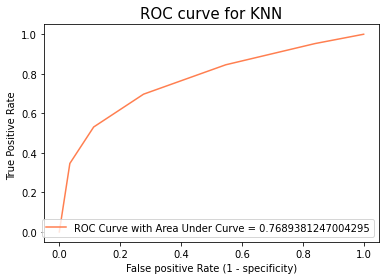

In [317]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter Tuning

In [318]:
h_params={'n_neighbors':range(1,11,2),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}
rscv=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1,n_jobs=-1)
results=rscv.fit(predictor,response)

In [319]:
knn_tuned_model=results.best_estimator_
knn_tuned_model.fit(x_train,y_train)
y_pred=knn_tuned_model.predict(x_test)
y_pred_proba=knn_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[1125,  345],
       [ 496, 1051]], dtype=int64)

In [320]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1470
           1       0.75      0.68      0.71      1547

    accuracy                           0.72      3017
   macro avg       0.72      0.72      0.72      3017
weighted avg       0.72      0.72      0.72      3017


Accuracy is :  0.7212462711302619
Precission :  0.752865329512894
Recall :  0.6793794440853265
f1-score :  0.7142371729527692
Roc Auc score :  0.7223427832671531


Area under the ROC curve :  0.7800216790012707


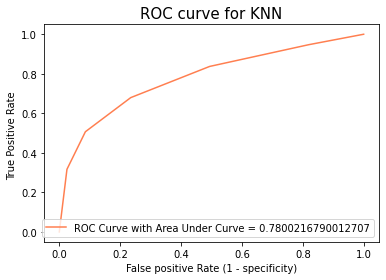

In [321]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [322]:
Performance_with_over_sampled_data['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [323]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
print('Training Accuracy : ',dt_model.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',dt_model.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

Training Accuracy :  0.9995855781185247
Testing Accuracy :  0.7149486244613855


array([[871, 599],
       [724, 823]], dtype=int64)

In [324]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1470
           1       0.58      0.53      0.55      1547

    accuracy                           0.56      3017
   macro avg       0.56      0.56      0.56      3017
weighted avg       0.56      0.56      0.56      3017


Accuracy is :  0.5614849187935035
Precission :  0.5787623066104078
Recall :  0.5319974143503555
f1-score :  0.5543954193331088
Roc Auc score :  0.5622572105765382


In [325]:
y_pred_proba = dt_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.7143178150381031


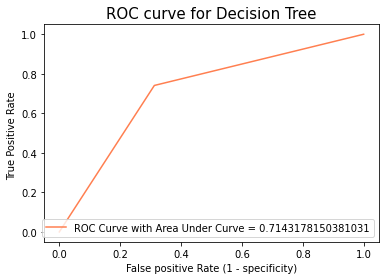

In [326]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning

In [327]:
h_params={'criterion':["gini", "entropy"],
        'splitter':["best", "random"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}
rscv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1,n_jobs=-1)
results=rscv.fit(predictor,response)

In [328]:
dt_tuned_model=results.best_estimator_
dt_tuned_model.fit(x_train,y_train)
y_pred=dt_tuned_model.predict(x_test)
y_pred_proba=dt_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[1316,  154],
       [ 622,  925]], dtype=int64)

In [329]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77      1470
           1       0.86      0.60      0.70      1547

    accuracy                           0.74      3017
   macro avg       0.77      0.75      0.74      3017
weighted avg       0.77      0.74      0.74      3017


Accuracy is :  0.7427908518395757
Precission :  0.8572752548656163
Recall :  0.5979314802844214
f1-score :  0.7044935262757044
Roc Auc score :  0.7465847877612585


Area under the ROC curve :  0.7926205647094002


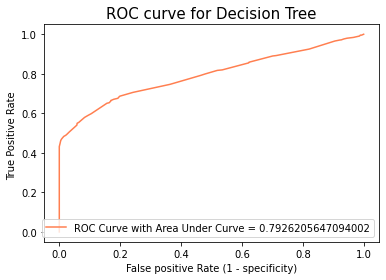

In [330]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [331]:
Performance_with_over_sampled_data['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [332]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
print('Training Accuracy : ',rf_model.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',rf_model.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

Training Accuracy :  0.9995855781185247
Testing Accuracy :  0.772290354656944


array([[871, 599],
       [724, 823]], dtype=int64)

In [333]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1470
           1       0.58      0.53      0.55      1547

    accuracy                           0.56      3017
   macro avg       0.56      0.56      0.56      3017
weighted avg       0.56      0.56      0.56      3017


Accuracy is :  0.5614849187935035
Precission :  0.5787623066104078
Recall :  0.5319974143503555
f1-score :  0.5543954193331088
Roc Auc score :  0.5622572105765382


In [334]:
y_pred_proba = rf_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8306773258754051


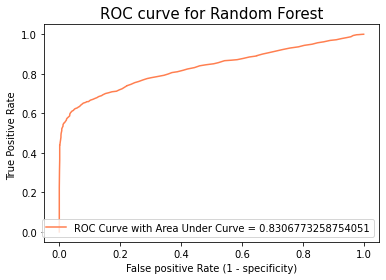

In [335]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random Forest',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# Hyperparamater Tuning

In [336]:
h_params={'n_estimators':[10,20,30,50,100,150,200],
        'criterion':["gini", "entropy"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

rscv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1,n_jobs=-1)
results=rscv.fit(predictor,response)

In [337]:
rf_tuned_model=results.best_estimator_
rf_tuned_model.fit(x_train,y_train)
y_pred=rf_tuned_model.predict(x_test)
y_pred_proba=rf_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[1379,   91],
       [ 580,  967]], dtype=int64)

In [338]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80      1470
           1       0.91      0.63      0.74      1547

    accuracy                           0.78      3017
   macro avg       0.81      0.78      0.77      3017
weighted avg       0.81      0.78      0.77      3017


Accuracy is :  0.7775936360623136
Precission :  0.9139886578449905
Recall :  0.6250808015513898
f1-score :  0.7424184261036468
Roc Auc score :  0.7815880198233139


Area under the ROC curve :  0.8289291540792142


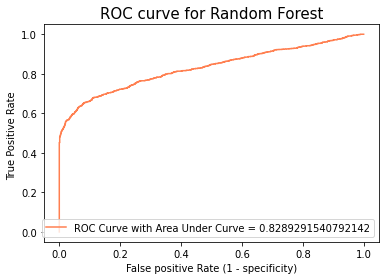

In [339]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random Forest',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [340]:
Performance_with_over_sampled_data['Random Forest']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [341]:
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
print('Training Accuracy : ',gb_model.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',gb_model.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

Training Accuracy :  0.7872358060505594
Testing Accuracy :  0.7782565462379848


array([[871, 599],
       [724, 823]], dtype=int64)

In [342]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1470
           1       0.58      0.53      0.55      1547

    accuracy                           0.56      3017
   macro avg       0.56      0.56      0.56      3017
weighted avg       0.56      0.56      0.56      3017


Accuracy is :  0.5614849187935035
Precission :  0.5787623066104078
Recall :  0.5319974143503555
f1-score :  0.5543954193331088
Roc Auc score :  0.5622572105765382


In [343]:
y_pred_proba = gb_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8337299755066863


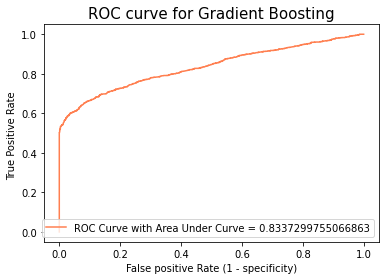

In [344]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient Boosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning

In [345]:
h_params={'n_estimators':[10,20,30,50,70],
        'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':[1,3,5,7,10,15,20],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60]}

rscv=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1,n_jobs=-1)
results=rscv.fit(predictor,response)

In [346]:
gb_tuned_model=results.best_estimator_
gb_tuned_model.fit(x_train,y_train)
y_pred=gb_tuned_model.predict(x_test)
y_pred_proba=gb_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[1370,  100],
       [ 556,  991]], dtype=int64)

In [347]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1470
           1       0.91      0.64      0.75      1547

    accuracy                           0.78      3017
   macro avg       0.81      0.79      0.78      3017
weighted avg       0.81      0.78      0.78      3017


Accuracy is :  0.7825654623798475
Precission :  0.9083409715857012
Recall :  0.6405946994182288
f1-score :  0.7513267626990143
Roc Auc score :  0.7862837442669376


Area under the ROC curve :  0.8326411883434692


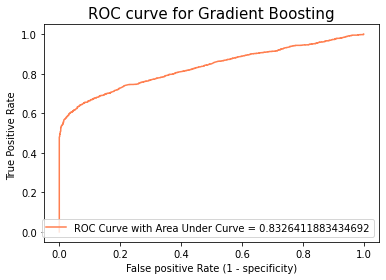

In [348]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient Boosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [349]:
Performance_with_over_sampled_data['Gradient boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Adaboost

In [350]:
adb_model=AdaBoostClassifier()
adb_model.fit(x_train,y_train)
print('Training Accuracy : ',adb_model.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',adb_model.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

Training Accuracy :  0.7701616245337753
Testing Accuracy :  0.7683128936029168


array([[871, 599],
       [724, 823]], dtype=int64)

In [351]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1470
           1       0.58      0.53      0.55      1547

    accuracy                           0.56      3017
   macro avg       0.56      0.56      0.56      3017
weighted avg       0.56      0.56      0.56      3017


Accuracy is :  0.5614849187935035
Precission :  0.5787623066104078
Recall :  0.5319974143503555
f1-score :  0.5543954193331088
Roc Auc score :  0.5622572105765382


In [352]:
y_pred_proba = adb_model.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8268067666627091


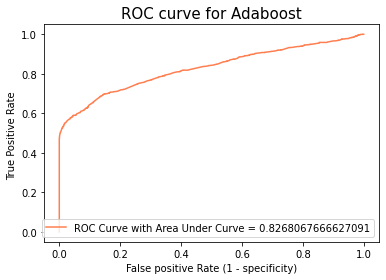

In [353]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboost',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning

In [354]:
h_params={'n_estimators':[10,20,30,50,70],
        'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,2,5],
        'algorithm' : ['SAMME', 'SAMME.R']}

rscv=RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1,n_jobs=-1)
results=rscv.fit(predictor,response)

In [355]:
adb_tuned_model=results.best_estimator_
adb_tuned_model.fit(x_train,y_train)
y_pred=adb_tuned_model.predict(x_test)
y_pred_proba=adb_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[1324,  146],
       [ 550,  997]], dtype=int64)

In [356]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1470
           1       0.87      0.64      0.74      1547

    accuracy                           0.77      3017
   macro avg       0.79      0.77      0.77      3017
weighted avg       0.79      0.77      0.77      3017


Accuracy is :  0.7693072588664236
Precission :  0.8722659667541557
Recall :  0.6444731738849386
f1-score :  0.7412639405204461
Roc Auc score :  0.7725767229968911


Area under the ROC curve :  0.8271363490451126


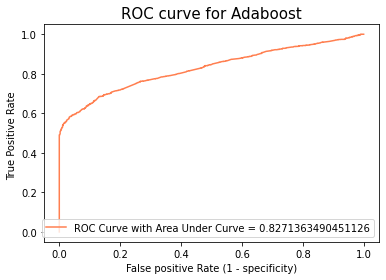

In [357]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboost',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [358]:
Performance_with_over_sampled_data['Adaboost']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# XGBoost

In [359]:
xgb_mode=XGBClassifier()
xgb_mode.fit(x_train,y_train)
print('Training Accuracy : ',xgb_mode.score(x_train,y_train))
y_pred=xgb_mode.predict(x_test)
print('Testing Accuracy : ',xgb_mode.score(x_test,y_test))

confusion_matrix(y_test,y_pred)

[21:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy :  0.8914214670534604
Testing Accuracy :  0.7974809413324494


array([[1307,  163],
       [ 448, 1099]], dtype=int64)

In [360]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1470
           1       0.87      0.71      0.78      1547

    accuracy                           0.80      3017
   macro avg       0.81      0.80      0.80      3017
weighted avg       0.81      0.80      0.80      3017


Accuracy is :  0.7974809413324494
Precission :  0.8708399366085579
Recall :  0.7104072398190046
f1-score :  0.7824848700605198
Roc Auc score :  0.7997614430387541


In [361]:
y_pred_proba = xgb_mode.predict_proba(x_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.8592892101895704


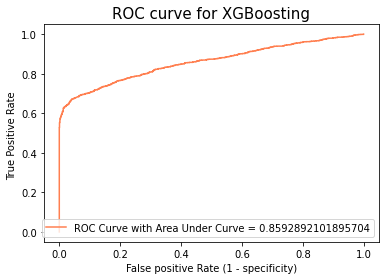

In [362]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for XGBoosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning

In [363]:
h_params={'n_estimators':[10,20,30,50,70],
          'max_depth':[1,3,5,7,10,15,20,25],
        'learning_rate':[0.01,0.05,0.1,0.02,0.15],
         'reg_alpha':[1e-5,1e-2,0.1,0.5,0.05,1]}
rscv=RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1,n_jobs=-1)
results=rscv.fit(predictor,response)

[21:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [364]:
xgb_tuned_model=results.best_estimator_
xgb_tuned_model.fit(x_train,y_train)
y_pred=xgb_tuned_model.predict(x_test)
y_pred_proba=xgb_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

[21:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[1335,  135],
       [ 496, 1051]], dtype=int64)

In [365]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      1470
           1       0.89      0.68      0.77      1547

    accuracy                           0.79      3017
   macro avg       0.81      0.79      0.79      3017
weighted avg       0.81      0.79      0.79      3017


Accuracy is :  0.7908518395757375
Precission :  0.8861720067453626
Recall :  0.6793794440853265
f1-score :  0.7691181851445298
Roc Auc score :  0.7937713546957245


Area under the ROC curve :  0.8470449718348878


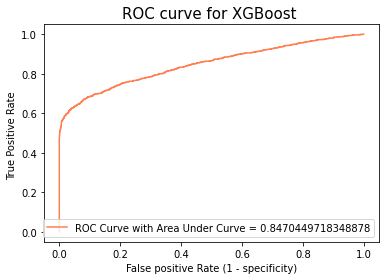

In [366]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for XGBoost ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [367]:
Performance_with_over_sampled_data['XGBoost']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

In [368]:
Performance_with_over_sampled_data

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Gradient boosting,Adaboost,XGBoost
Accuracy,0.698376,0.561485,0.721246,0.742791,0.777594,0.782565,0.769307,0.790852
Precision,0.721027,0.578762,0.752865,0.857275,0.913989,0.908341,0.872266,0.886172
Recall,0.671622,0.531997,0.679379,0.597931,0.625081,0.640595,0.644473,0.679379
F1_score,0.695448,0.554395,0.714237,0.704494,0.742418,0.751327,0.741264,0.769118
AUC,0.763859,0.821485,0.780022,0.792621,0.828929,0.832641,0.827136,0.847045
